### Problem Statement:
Leveraging the data given by Delhivery of trip records, help the company to clean, sanitize and manipulate data to get useful features out of raw fields and make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
#Loading the dataset
df = pd.read_csv("C:/Users/USER/Downloads/delhivery_data.csv")

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
#Checking the shape of the data
df.shape

(144867, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

##### We can see the colums related to time have object datatype so we can change that to datetime for analysis

In [6]:
df.describe(include = 'all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [7]:
df.describe(include = np.number)

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [8]:
df.describe(include = object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [9]:
#checking for unique values in each column
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

##### We can see that there are total 14817 unique trips and 1504 unique routes available in data. 1508 unique source centers and 1481 unique destinaiton centers are there.

#### Missing values treatment

In [10]:
#Checcking for % missing values in dataset
df.isnull().sum()/len(df)*100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

##### We can see that there are few missing values in column source_name and destination_name and percentange is very less for those missing values so we can drop them

In [11]:
#Dropping missing values
df.dropna(inplace = True)

In [12]:
#Checcking for % missing values in dataset
df.isnull().sum()/len(df)*100

data                              0.0
trip_creation_time                0.0
route_schedule_uuid               0.0
route_type                        0.0
trip_uuid                         0.0
source_center                     0.0
source_name                       0.0
destination_center                0.0
destination_name                  0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
is_cutoff                         0.0
cutoff_factor                     0.0
cutoff_timestamp                  0.0
actual_distance_to_destination    0.0
actual_time                       0.0
osrm_time                         0.0
osrm_distance                     0.0
factor                            0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
segment_osrm_distance             0.0
segment_factor                    0.0
dtype: float64

In [13]:
#changing the datatype of time columns to datetime
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

##### There are unknown fields available in our dataset so we can drop those columns

In [14]:
#Dropping the unknown fields columns from data
df.drop(columns = ['is_cutoff','cutoff_factor','cutoff_timestamp', 'factor', 'segment_factor'], inplace = True)

In [15]:
#Creating a new feature to analyse the difference between actual time and osrm_time
df['time_difference'] = df['actual_time']-df['osrm_time']

In [16]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_difference
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,3.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,4.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,12.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,22.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,24.0
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171,4.0
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719,27.0
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362,36.0
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648,37.0
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434,57.0


##### Here we can see that one trip is divided in many segment so we can aggregate those to analyse

In [17]:
df2 = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg({'source_name': 'last', 
     'destination_name': 'last','data': 'last','trip_creation_time': 'last',
     'route_schedule_uuid': 'last', 'route_type': 'last','od_start_time': 'last', 
     'od_end_time': 'last', 'start_scan_to_end_scan':'last','actual_distance_to_destination': 'last', 
     'osrm_distance':'last', 'time_difference': 'sum', 'segment_actual_time': 'sum', 
     'segment_osrm_time': 'sum', 'segment_osrm_distance': 'sum', 'actual_time': 'last', 
     'osrm_time': 'last'}).reset_index()

In [18]:
df2

,trip_uuid,source_center,destination_center,source_name,destination_name,data,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,time_difference,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_time,osrm_time
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,446.5496,3020.0,728.0,534.0,670.6205,732.0,329.0
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,544.8027,4875.0,820.0,474.0,649.8528,830.0,388.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,28.1994,41.0,46.0,26.0,28.1995,47.0,26.0
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,56.9116,148.0,95.0,39.0,55.9899,96.0,42.0
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,281.2109,1174.0,608.0,231.0,317.7408,611.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,42.5213,13.0,49.0,42.0,42.1431,51.0,41.0
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,40.6080,65.0,89.0,77.0,78.5869,90.0,48.0
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,16.0185,29.0,29.0,14.0,16.0184,30.0,14.0
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,52.5303,219.0,233.0,42.0,52.5303,233.0,42.0


In [19]:
#Unique Trips
df2.trip_uuid.nunique()

14787

In [20]:
#Checking the no of unique trips for both training and test data
data_counts = df2.groupby('trip_uuid')['data'].last().reset_index().data.value_counts()
data_counts

training    10645
test         4142
Name: data, dtype: int64

In [21]:
df2.groupby('trip_uuid')['data'].last().reset_index().data.value_counts(normalize = True)*100

training    71.988909
test        28.011091
Name: data, dtype: float64

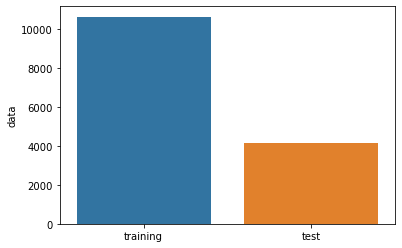

In [22]:
sns.barplot(x = data_counts.index, y = data_counts)
plt.show()

##### We can see there are 72% training data for each unique trip id and 28%  test data

In [23]:
#Checking the no of unique trips for both route_types
route_type_counts = df2.groupby('trip_uuid')['route_type'].last().reset_index().route_type.value_counts()
route_type_counts

Carting    8906
FTL        5881
Name: route_type, dtype: int64

In [24]:
df2.groupby('trip_uuid')['route_type'].last().reset_index().route_type.value_counts(normalize = True)*100

Carting    60.228579
FTL        39.771421
Name: route_type, dtype: float64

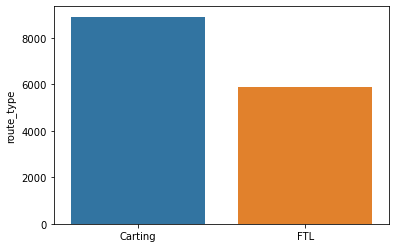

In [25]:
sns.barplot(x = route_type_counts.index, y = route_type_counts)
plt.show()

##### There are 60% of route types are carting means small vehicles are used in 60% of route types and 40% of route type are FTL means full truck loads are used in 40% of route types

In [26]:
#Extracting features from source_name
df2['source_state'] = df2['source_name'].str.split('(', expand = True)[1].str.split(')', expand = True)[0]
df2['source_code'] = df2['source_name'].str.split('_',2, expand = True)[2].str.split('(', expand = True)[0]
df2['source_city'] = df2['source_name'].str.split('_',2, expand = True)[0].str.split(expand = True)[0]
df2['source_place'] = df2['source_name'].str.split('_',2, expand = True)[1].str.split(expand = True)[0]

In [27]:
#Extracting features from destination_name
df2['destination_state'] = df2['destination_name'].str.split('(', expand = True)[1].str.split(')', expand = True)[0]
df2['destination_code'] = df2['destination_name'].str.split('_',2, expand = True)[2].str.split('(', expand = True)[0]
df2['destination_city'] = df2['destination_name'].str.split('_',2, expand = True)[0].str.split(expand = True)[0]
df2['destination_place'] = df2['destination_name'].str.split('_',2, expand = True)[1].str.split(expand = True)[0]

In [28]:
#Extracting features from trip creation time 
df2["trip_creation_day"] = df2["trip_creation_time"].dt.day_name()
df2["trip_creation_month"] = df2["trip_creation_time"].dt.month_name()
df2["trip_creation_year"] = df2["trip_creation_time"].dt.year

In [29]:
#Sorting the dataframe
df2.sort_values(by = ['trip_uuid','od_start_time'], ignore_index = True, inplace = True)

In [30]:
#Finding the no of trips created for each day 
day_trips = df2.groupby('trip_uuid')['trip_creation_day'].last().reset_index().trip_creation_day.value_counts()
day_trips

Wednesday    2731
Saturday     2128
Thursday     2103
Friday       2057
Tuesday      2035
Monday       1980
Sunday       1753
Name: trip_creation_day, dtype: int64

In [31]:
##Finding the % no of trips created for each day 
df2.groupby('trip_uuid')['trip_creation_day'].last().reset_index().trip_creation_day.value_counts(normalize = True)*100

Wednesday    18.468925
Saturday     14.391019
Thursday     14.221952
Friday       13.910868
Tuesday      13.762088
Monday       13.390140
Sunday       11.855008
Name: trip_creation_day, dtype: float64

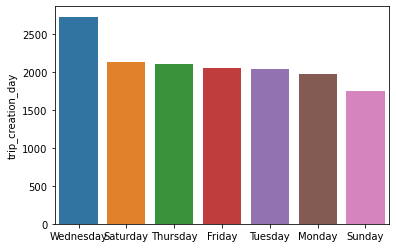

In [32]:
sns.barplot(x = day_trips.index, y = day_trips)
plt.show()

##### Most of the trips(18.5%) in the data are created on wednesday followed by saturday

In [33]:
#Finding the no of trips created for each month
df2.groupby('trip_uuid')['trip_creation_month'].last().reset_index().trip_creation_month.value_counts()

September    13011
October       1776
Name: trip_creation_month, dtype: int64

In [34]:
df2.groupby('trip_uuid')['trip_creation_year'].last().reset_index().trip_creation_year.value_counts()

2018    14787
Name: trip_creation_year, dtype: int64

##### We can see that trip data is given for september and october 2018

In [35]:
#Creating new feature from the difference of od end time and od start time
df2['od_time_difference'] = (df2['od_end_time'] - df2['od_start_time'])/pd.Timedelta(1,unit="hour")

In [36]:
#Converting all time columns into hours
df2["actual_time"] = df2["actual_time"]/60
df2["osrm_time"] = df2["osrm_time"]/60
df2["start_scan_to_end_scan"] = df2["start_scan_to_end_scan"]/60
df2["segment_actual_time"] = df2["segment_actual_time"]/60
df2["segment_osrm_time"] = df2["segment_osrm_time"]/60

In [37]:
df2.source_state.unique()

array(['Madhya Pradesh', 'Uttar Pradesh', 'Karnataka', 'Haryana',
       'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana',
       'Andhra Pradesh', 'Rajasthan', 'Assam', 'West Bengal', 'Punjab',
       'Chandigarh', 'Goa', 'Uttarakhand', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Himachal Pradesh', 'Kerala', 'Arunachal Pradesh',
       'Bihar', 'Meghalaya', 'Chhattisgarh', 'Jammu & Kashmir',
       'Dadra and Nagar Haveli', 'Mizoram', 'Tripura', 'Nagaland'],
      dtype=object)

In [38]:
df2.source_state.nunique()

31

##### We can see that almost all states and union territories are covered in india by Delhivery

In [39]:
df2.source_city.nunique()

1240

##### 1240 cities are covered in india by Delhivery

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26222 non-null  object        
 1   source_center                   26222 non-null  object        
 2   destination_center              26222 non-null  object        
 3   source_name                     26222 non-null  object        
 4   destination_name                26222 non-null  object        
 5   data                            26222 non-null  object        
 6   trip_creation_time              26222 non-null  datetime64[ns]
 7   route_schedule_uuid             26222 non-null  object        
 8   route_type                      26222 non-null  object        
 9   od_start_time                   26222 non-null  datetime64[ns]
 10  od_end_time                     26222 non-null  datetime64[ns]
 11  st

#### Aggregating all data to create a dataframe consiting one row of each unique trip id

In [41]:
#Generating a dataframe for unique trip_uuid
data = (df2.groupby('trip_uuid').agg({'source_state': 'first', 'source_city':'first', 'destination_state':'last', 
                                      'destination_city': 'last', 'route_type': 'last', 'data':'last',
                                     'od_time_difference': 'sum', 'start_scan_to_end_scan': 'sum','actual_time': 'sum', 
                                     'osrm_time': 'sum', 'segment_actual_time':'sum', 'segment_osrm_time':'sum', 
                                     'osrm_distance': 'sum', 'segment_osrm_distance':'sum',
                                     'actual_distance_to_destination': 'sum'})).reset_index()

In [42]:
data.head()

,trip_uuid,source_state,source_city,destination_state,destination_city,route_type,data,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,Madhya Pradesh,Bhopal,Haryana,Gurgaon,FTL,training,37.668497,37.650000,26.033333,11.950000,25.800000,16.800000,991.3523,1320.4733,824.732854
1,trip-153671042288605164,Karnataka,Tumkur,Karnataka,Chikblapur,Carting,training,3.026865,3.000000,2.383333,1.133333,2.350000,1.083333,85.1110,84.1894,73.186911
2,trip-153671043369099517,Karnataka,Bangalore,Punjab,Chandigarh,FTL,training,65.572709,65.550000,55.783333,29.000000,55.133333,32.350000,2354.0665,2545.2678,1927.404273
3,trip-153671046011330457,Maharashtra,Mumbai,Maharashtra,Mumbai,Carting,training,1.674916,1.666667,0.983333,0.250000,0.983333,0.266667,19.6800,19.8766,17.175274
4,trip-153671052974046625,Karnataka,Bellary,Karnataka,Bellary,FTL,training,11.972484,11.950000,5.683333,1.950000,5.666667,1.916667,146.7918,146.7919,127.448500


In [43]:
data.shape

(14787, 16)

In [44]:
#Checcking for % missing values in dataset
data.isnull().sum()/len(data)*100

trip_uuid                         0.0
source_state                      0.0
source_city                       0.0
destination_state                 0.0
destination_city                  0.0
route_type                        0.0
data                              0.0
od_time_difference                0.0
start_scan_to_end_scan            0.0
actual_time                       0.0
osrm_time                         0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
osrm_distance                     0.0
segment_osrm_distance             0.0
actual_distance_to_destination    0.0
dtype: float64

In [45]:
#Cleaning the data 
data['source_city'].replace({'Del':'Delhi', 'Bangalore':'Bengaluru', 'AMD' : 'Ahmedabad'},inplace=True)
data['destination_city'].replace({ 'Del':'Delhi', 'Bangalore':'Bengaluru', 'AMD' : 'Ahmedabad'},inplace=True)

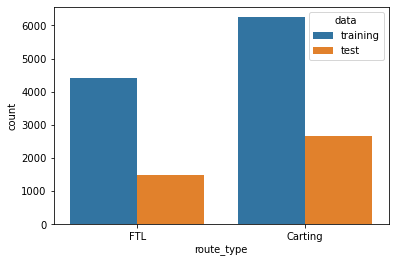

In [46]:
sns.countplot(data= data, x = 'route_type', hue = 'data')
plt.show()

##### We can see there is more training data in the dataset for both route types

In [47]:
#Finding all object columns
object_cols = list(data.dtypes[data.dtypes == object].index)
object_cols

['trip_uuid',
 'source_state',
 'source_city',
 'destination_state',
 'destination_city',
 'route_type',
 'data']

In [48]:
for col in object_cols[1:-2]:
    print(f'For {col}:')
    print(data[col].value_counts().head())
    print('*'*50)

For source_state:
Maharashtra    2682
Karnataka      2229
Haryana        1669
Tamil Nadu     1085
Delhi           790
Name: source_state, dtype: int64
**************************************************
For source_city:
Bengaluru    1770
Gurgaon      1013
Mumbai        893
Bhiwandi      811
Delhi         789
Name: source_city, dtype: int64
**************************************************
For destination_state:
Maharashtra    2591
Karnataka      2276
Haryana        1664
Tamil Nadu     1072
Telangana       843
Name: destination_state, dtype: int64
**************************************************
For destination_city:
Bengaluru    1702
Mumbai       1127
Gurgaon       869
Delhi         636
Hyderabad     630
Name: destination_city, dtype: int64
**************************************************


##### We can see that maximum trips are starting from Maharashtra state closely followed by karnataka but in the city, Bengluru is the source of highest no of trips followed by Gurgaon
##### We can also see that most orders are coming from Maharashtra state again followed by karnataka and in the city, most orders are coming from Bengaluru followed by Mumbai

Maharashtra-Maharashtra        2406
Karnataka-Karnataka            2015
Tamil Nadu-Tamil Nadu          1016
Haryana-Haryana                 867
Telangana-Telangana             655
Gujarat-Gujarat                 624
West Bengal-West Bengal         610
Uttar Pradesh-Uttar Pradesh     544
Punjab-Punjab                   491
Rajasthan-Rajasthan             422
dtype: int64


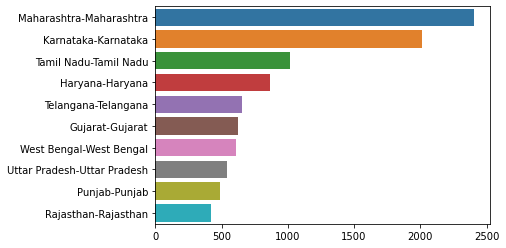

In [49]:
#Finding the busiest route for states
route_state = data['source_state'] + '-' + data['destination_state']
print(route_state.value_counts().head(10))
sns.barplot(y = route_state.value_counts().head(10).index, x = route_state.value_counts().head(10).values )
plt.show()

Delhi-Haryana            396
Haryana-Delhi            311
Haryana-Uttar Pradesh     93
Delhi-Uttar Pradesh       92
Haryana-Punjab            82
Uttar Pradesh-Delhi       77
Uttar Pradesh-Haryana     71
Haryana-Rajasthan         70
Maharashtra-Telangana     52
Karnataka-Telangana       51
dtype: int64


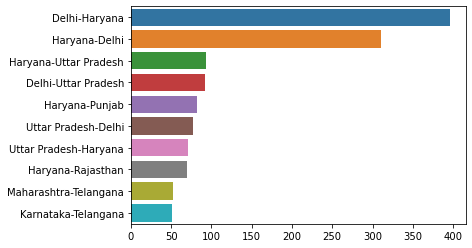

In [50]:
#Finding the busiest route between states
data_inter_state= data[data['source_state'] != data['destination_state']]
route_inter_state = data_inter_state['source_state'] + '-' + data_inter_state['destination_state']
print(route_inter_state.value_counts().head(10))
sns.barplot(y = route_inter_state.value_counts().head(10).index, x = route_inter_state.value_counts().head(10).values )
plt.show()

##### Delhi to Haryana and Haryana to Delhi are the busiest routes between states

Bengaluru-Bengaluru      1376
Mumbai-Mumbai             600
Bhiwandi-Mumbai           437
Hyderabad-Hyderabad       398
Mumbai-Bhiwandi           270
Delhi-Gurgaon             261
Gurgaon-Delhi             251
Chandigarh-Chandigarh     250
Chennai-Chennai           201
Delhi-Delhi               181
dtype: int64


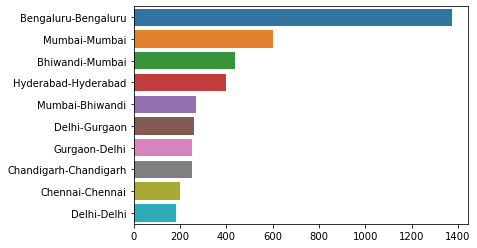

In [51]:
#Finding the busiest route between cities
route_city = data['source_city'] + '-' + data['destination_city']
print(route_city.value_counts().head(10))
sns.barplot(y = route_city.value_counts().head(10).index, x = route_city.value_counts().head(10).values )
plt.show()

##### Most trips are happening in Bengaluru only followed by Mumbai and Bhiwani to Mumbai

Bhiwandi-Mumbai    437
Mumbai-Bhiwandi    270
Delhi-Gurgaon      261
Gurgaon-Delhi      251
MAA-Chennai        178
Pune-PNQ           116
Chennai-MAA        115
Bengaluru-HBR       96
Kolkata-CCU         96
Gurgaon-Sonipat     92
dtype: int64


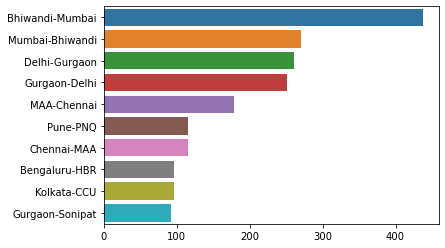

In [52]:
#Finding the busiest route between cities
data_inter_city= data[data['source_city'] != data['destination_city']]
route_inter_city = data_inter_city['source_city'] + '-' + data_inter_city['destination_city']
print(route_inter_city.value_counts().head(10))
sns.barplot(y = route_inter_city.value_counts().head(10).index, x = route_inter_city.value_counts().head(10).values )
plt.show()

##### Bhiwandi to Mumbai and Mumbai to Bhiwandi are the busiest routes between cities followed by Delhi-Gurgaon

In [53]:
#Average Longest Route
data.groupby(['source_city', 'destination_city']).agg({'actual_distance_to_destination': 
 'mean', 'trip_uuid': 'count'}).reset_index().sort_values('actual_distance_to_destination', ascending = False).head(10)

,source_city,destination_city,actual_distance_to_destination,trip_uuid
610,Guwahati,Bhiwandi,2139.367518,5
256,Bhiwandi,Guwahati,2061.156970,1
332,Chandigarh,Bengaluru,1927.400257,20
189,Bengaluru,Chandigarh,1927.089877,17
193,Bengaluru,Delhi,1765.193320,14
986,MAA,Gurgaon,1730.821463,2
597,Gurgaon,MAA,1721.280753,14
195,Bengaluru,Gurgaon,1690.293532,38
572,Gurgaon,Bengaluru,1689.690467,47
258,Bhiwandi,Kolkata,1628.807438,9


##### We can see that longest avg distance covered by delhivery is Guwahati to Bhiwandi followed by Chandigarh to Bengaluru
##### Among the longest routes, we can see that most trips are happening between Gurgaon to Bengaluru

### Hypothesis Testing to check the difference between od_time_difference and start_scan_to_end_scan

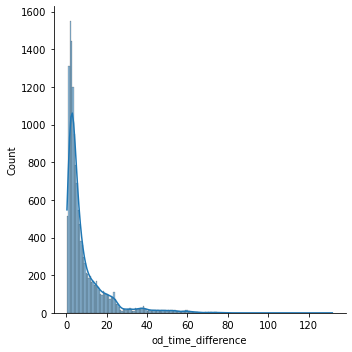

In [54]:
sns.displot(data['od_time_difference'], kde = True)
plt.show()

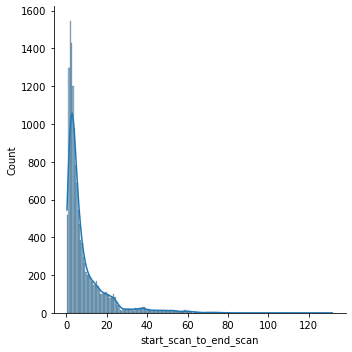

In [55]:
sns.displot(data['start_scan_to_end_scan'], kde = True)
plt.show()

##### Hypothesis:
##### H0: od_time_difference and start_scan_to_end_scan are similar
##### Ha: od_time_difference and start_scan_to_end_scan are different

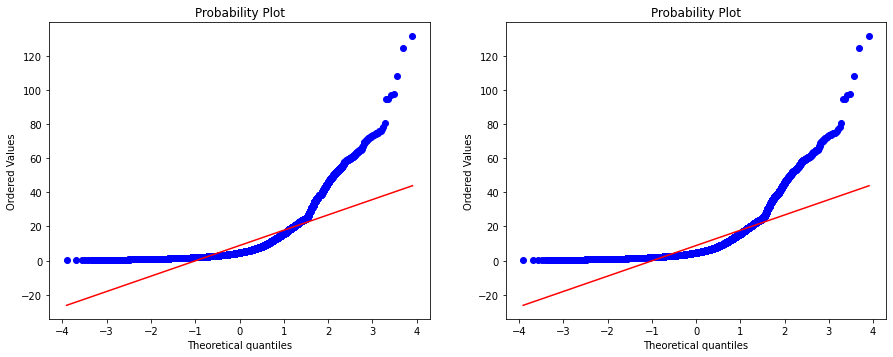

In [56]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(data['od_time_difference'], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(data['start_scan_to_end_scan'], dist=stats.norm, plot=ax2)
plt.show()

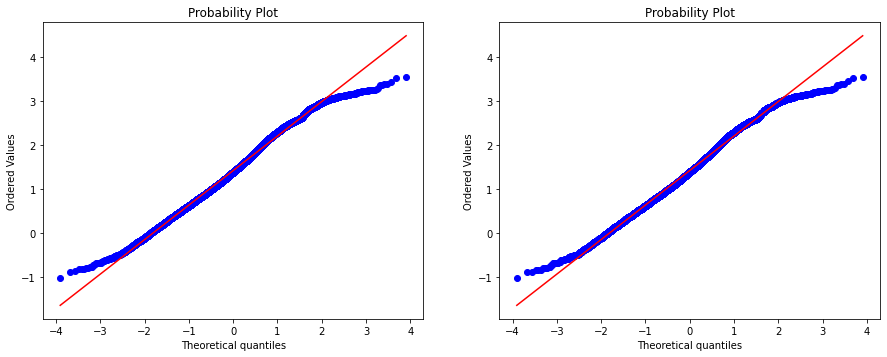

In [57]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(data['od_time_difference'])[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(data['start_scan_to_end_scan'])[0], dist=stats.norm, plot=ax2)
plt.show()

##### We can see that both variables are not following normal distribution

In [58]:
#Cheking for variance
np.var(data['od_time_difference']),np.var(data['start_scan_to_end_scan'])


(120.39190270762157, 120.33317495688316)

In [59]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(data['od_time_difference'], data['start_scan_to_end_scan'])

LeveneResult(statistic=0.0016940210507883507, pvalue=0.9671698260469903)

##### P value is greater than significance level 0.05 so we fail to reject the levene's test null hypothesis
##### Variances for both variabels are equal

##### Here the assumption for variance is held but assumption for normality fails
##### So applying kruskal wallis test

In [60]:
stats.kruskal(data['od_time_difference'], data['start_scan_to_end_scan'])

KruskalResult(statistic=0.07729788325485439, pvalue=0.7809931917791302)

##### We can see that P value is high and greater than 0.05
##### if alpha = 0.05, confidence = 95%
##### We fail to reject the null hypothesis so od_time_difference and start_scan_to_end_scan are similar 
###### The result was expected because start_scan_to_end_scan is the time taken to deliver from source to destination and od_time_difference is the time difference between trip start time and trip end time, both are supposed to be almost same

### Hypothesis Testing to check the difference between actual time and osrm time

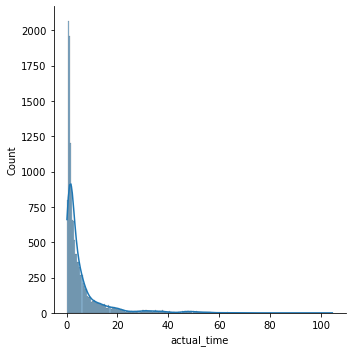

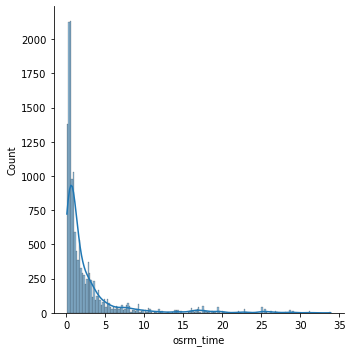

In [61]:
sns.displot(data['actual_time'], kde = True)
sns.displot(data['osrm_time'], kde = True)
plt.show()

##### Hypothesis:
##### H0: Actual time and osrm time are similar
##### Ha: Actual time and osrm time are different

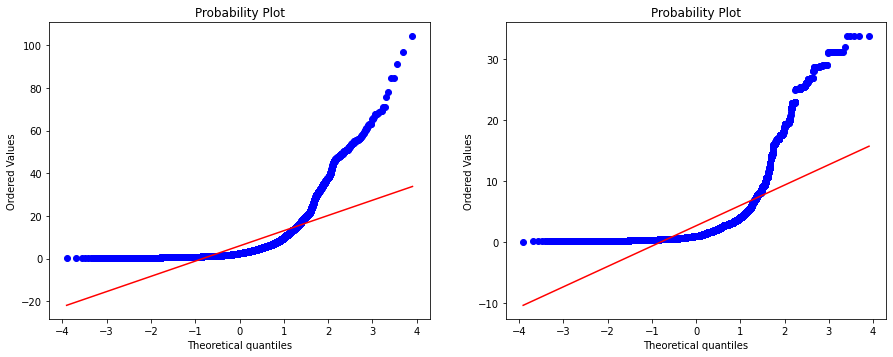

In [62]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(data['actual_time'], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(data['osrm_time'], dist=stats.norm, plot=ax2)
plt.show()

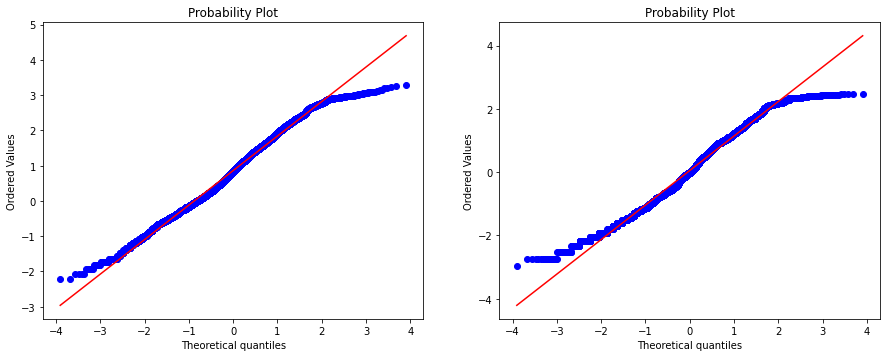

In [63]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(data['actual_time'])[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(data['osrm_time'])[0], dist=stats.norm, plot=ax2)
plt.show()

##### We can see that both variables are not following normal distribution

In [64]:
#Cheking for variance
np.var(data['actual_time']),np.var(data['osrm_time'])

(87.57807474086707, 20.468131594299653)

In [65]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(data['actual_time'], data['osrm_time'])

LeveneResult(statistic=1013.8463480511728, pvalue=8.743536461316657e-219)

##### P value is less than significance level 0.05 so we reject the levene's test null hypothesis
##### Variances for both variabels are not equal

##### Here the assumption for normality and variance are failed
##### So applying kruskal wallis test

In [66]:
stats.kruskal(data['actual_time'], data['osrm_time'])

KruskalResult(statistic=3407.391885074224, pvalue=0.0)

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so there is statistically significant difference between actual time and osrm time
##### It means actual time taken to complete the delivery and times provided by routing engine are different 

### Hypothesis Testing to check the difference between actual time and segment actual time

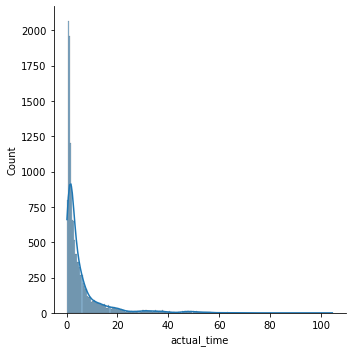

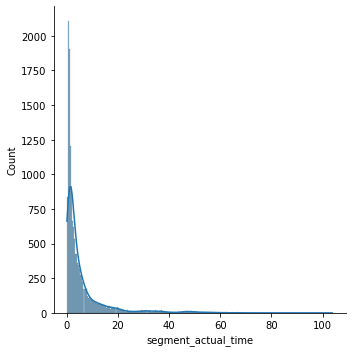

In [67]:
sns.displot(data['actual_time'], kde = True)
sns.displot(data['segment_actual_time'], kde = True)
plt.show()

##### Hypothesis:
##### H0: Actual time and segment actual time are similar
##### Ha: Actual time and segment actual time are different

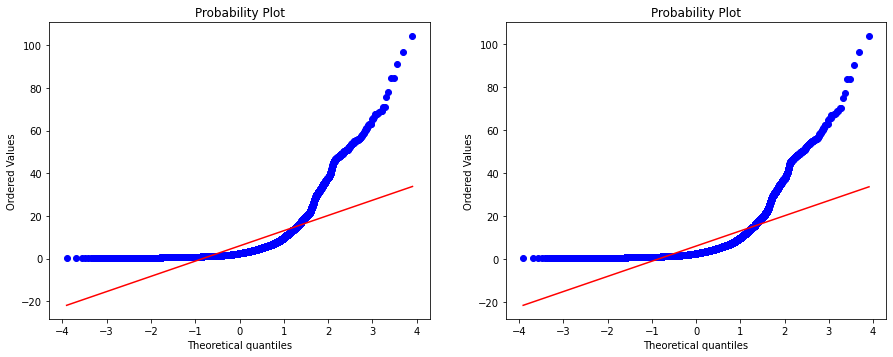

In [68]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(data['actual_time'], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(data['segment_actual_time'], dist=stats.norm, plot=ax2)
plt.show()

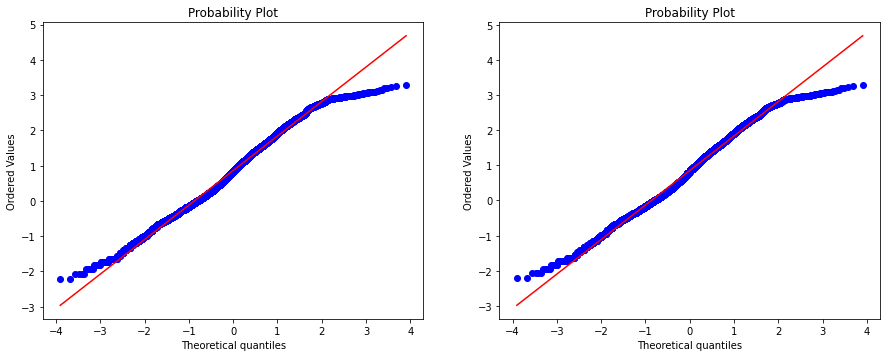

In [69]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(data['actual_time'])[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(data['segment_actual_time'])[0], dist=stats.norm, plot=ax2)
plt.show()

##### We can see that both variables are not following normal distributions

In [70]:
#Cheking for variance
np.var(data['actual_time']),np.var(data['segment_actual_time'])

(87.57807474086707, 85.97835924241137)

In [71]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(data['actual_time'], data['segment_actual_time'])

LeveneResult(statistic=0.15238623925017472, pvalue=0.6962681452003544)

##### P value is greater than significance level 0.05 so we fail to reject the levene's test null hypothesis
##### Variances for both variabels are equal

##### Here the assumption for variance is held but assumption for normality fails
##### So applying kruskal wallis test

In [72]:
stats.kruskal(data['actual_time'], data['segment_actual_time'])

KruskalResult(statistic=0.6616759823573649, pvalue=0.4159688813309349)

##### We can see that P value is high and greater than 0.05
##### if alpha = 0.05, confidence = 95%
##### We fail to reject the null hypothesis so actual time and segment actual time are similar 
##### The result time was expected because the segment actual time is the sum of time taken in each segment of the delivery so it is supposed to be almost same to the actual time taken to complete the delivery

### Hypothesis Testing to check the difference between osrm distance and segment osrm distance

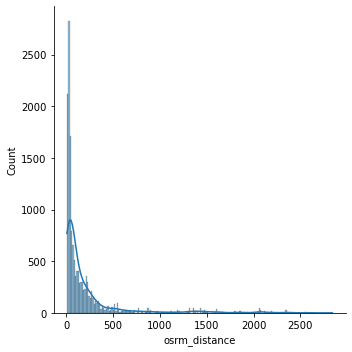

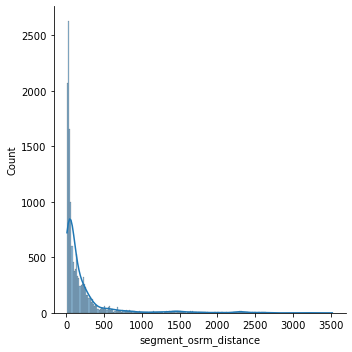

In [73]:
sns.displot(data['osrm_distance'], kde = True)
sns.displot(data['segment_osrm_distance'], kde = True)
plt.show()

##### Hypothesis:
##### H0: osrm distance and segment osrm distance are similar
##### Ha: osrm distance and segment osrm distance are different

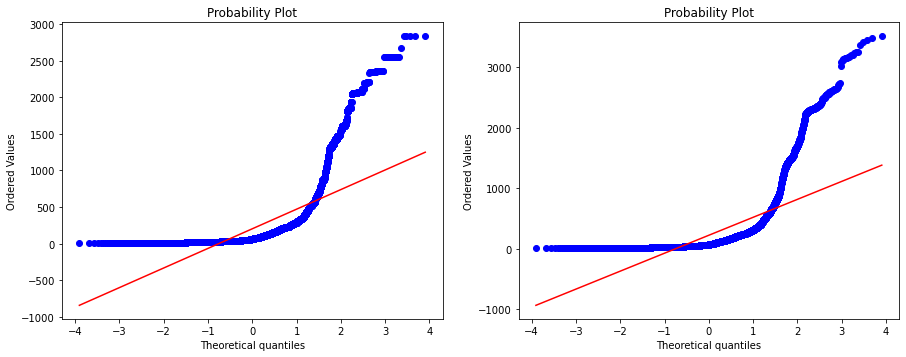

In [74]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(data['osrm_distance'], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(data['segment_osrm_distance'], dist=stats.norm, plot=ax2)
plt.show()

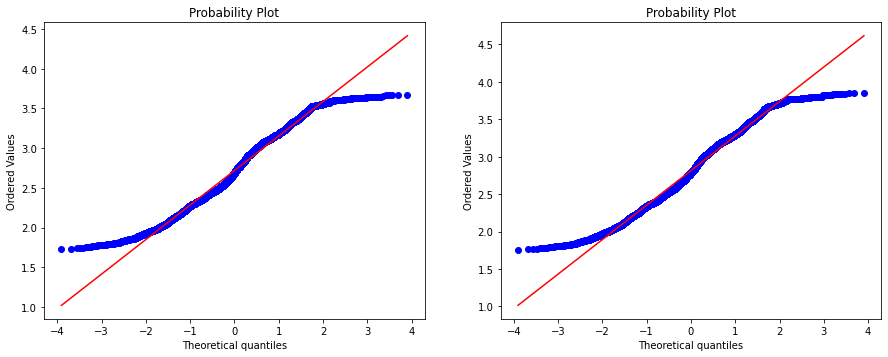

In [75]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(data['osrm_distance'])[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(data['segment_osrm_distance'])[0], dist=stats.norm, plot=ax2)
plt.show()

##### We can see that both variables are not following normal distributions

In [76]:
#Cheking for variance
np.var(data['osrm_distance']),np.var(data['segment_osrm_distance'])

(137309.55093363937, 173749.06940875118)

In [77]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(data['osrm_distance'], data['segment_osrm_distance'])

LeveneResult(statistic=13.640878396710558, pvalue=0.00022171213513990103)

##### P value is less than significance level 0.05 so we reject the levene's test null hypothesis
##### Variances for both variabels are not equal

##### Here the assumptions for normality and variance are failed
##### so applying kruskal walli's test 

In [78]:
stats.kruskal(data['osrm_distance'], data['segment_osrm_distance'])

KruskalResult(statistic=23.9279575754073, pvalue=1.000087996508925e-06)

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so there is statistically significant difference between osrm distance and segment osrm distance

### Hypothesis Testing to check the difference between osrm distance and segment osrm distance

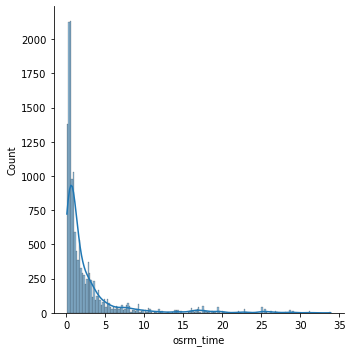

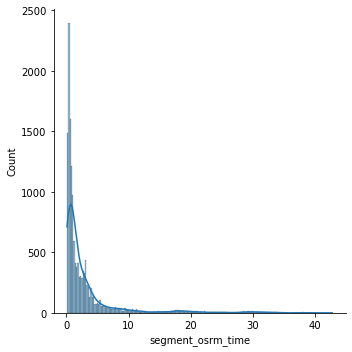

In [79]:
sns.displot(data['osrm_time'], kde = True)
sns.displot(data['segment_osrm_time'], kde = True)
plt.show()

##### Hypothesis:
##### H0: osrm time and segment osrm time are similar
##### Ha: osrm time and segment osrm time are different

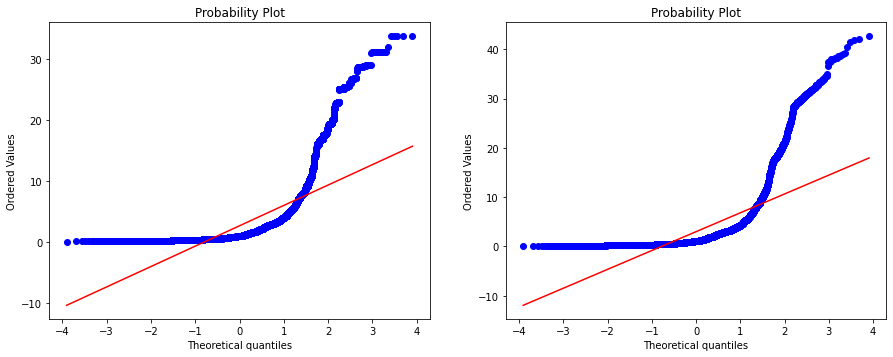

In [80]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(data['osrm_time'], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(data['segment_osrm_time'], dist=stats.norm, plot=ax2)
plt.show()

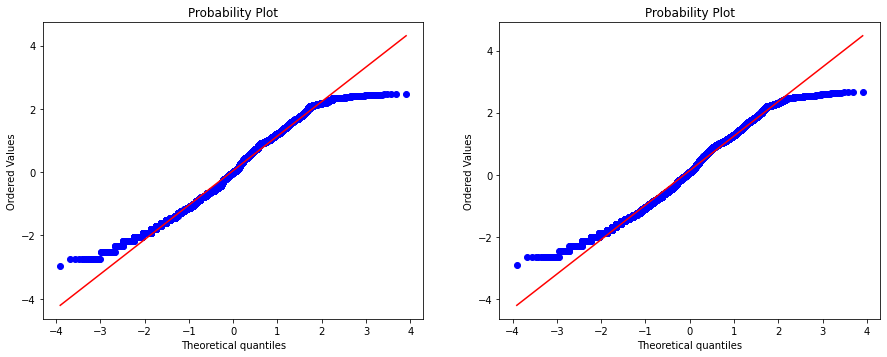

In [81]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(data['osrm_time'])[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(data['segment_osrm_time'])[0], dist=stats.norm, plot=ax2)
plt.show()

##### We can see that both variables are not following normal distribution

In [82]:
#Cheking for variance
np.var(data['osrm_time']),np.var(data['segment_osrm_time'])

(20.468131594299653, 27.50454229242158)

In [83]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(data['osrm_time'], data['segment_osrm_time'])

LeveneResult(statistic=28.539053431432833, pvalue=9.250556006347759e-08)

##### P value is less than significance level 0.05 so we reject the levene's test null hypothesis
##### Variances for both variabels are not equal

##### Here the assumptions for normality and variance are failed
##### so applying kruskal walli's test

In [84]:
stats.kruskal(data['osrm_time'], data['segment_osrm_time'])

KruskalResult(statistic=31.087969912089516, pvalue=2.4659498340809592e-08)

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so there is statistically significant difference between osrm time and segment osrm time

### Correlation Matrix

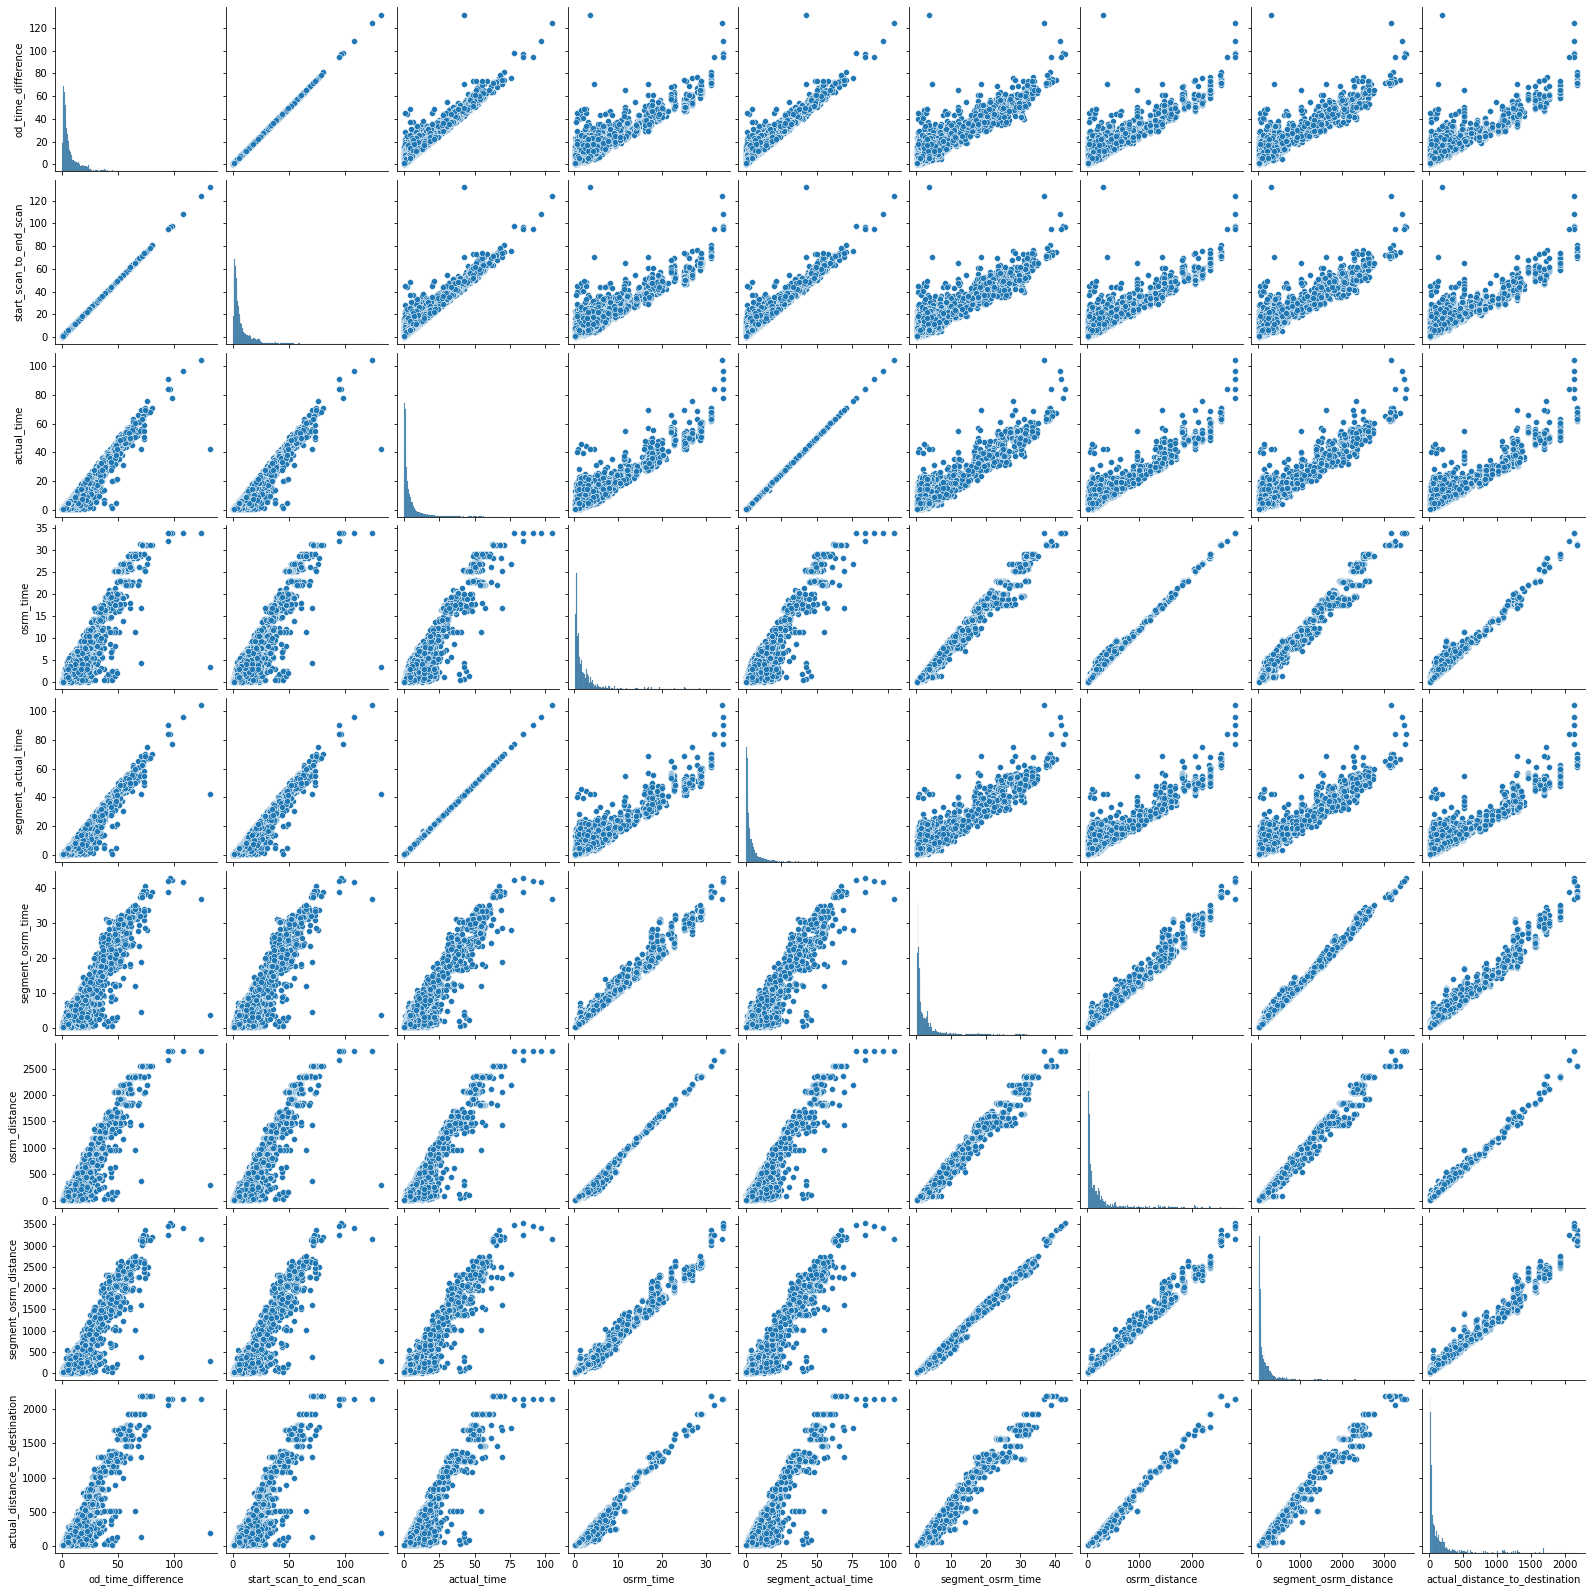

In [85]:
sns.pairplot(data)
plt.show()

##### We can see there is linear correlation between all numeric variables

In [86]:
data.corr()

,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
od_time_difference,1.000000,0.999999,0.961600,0.927490,0.961610,0.919431,0.925201,0.920171,0.919145
start_scan_to_end_scan,0.999999,1.000000,0.961652,0.927545,0.961662,0.919503,0.925280,0.920264,0.919231
actual_time,0.961600,0.961652,1.000000,0.958781,0.999989,0.954044,0.959398,0.957151,0.953920
osrm_time,0.927490,0.927545,0.958781,1.000000,0.957955,0.993263,0.997588,0.991624,0.993568
segment_actual_time,0.961610,0.961662,0.999989,0.957955,1.000000,0.953214,0.958540,0.956293,0.952987
segment_osrm_time,0.919431,0.919503,0.954044,0.993263,0.953214,1.000000,0.991802,0.996098,0.987542
osrm_distance,0.925201,0.925280,0.959398,0.997588,0.958540,0.991802,1.000000,0.994712,0.997268
segment_osrm_distance,0.920171,0.920264,0.957151,0.991624,0.956293,0.996098,0.994712,1.000000,0.993068
actual_distance_to_destination,0.919145,0.919231,0.953920,0.993568,0.952987,0.987542,0.997268,0.993068,1.000000


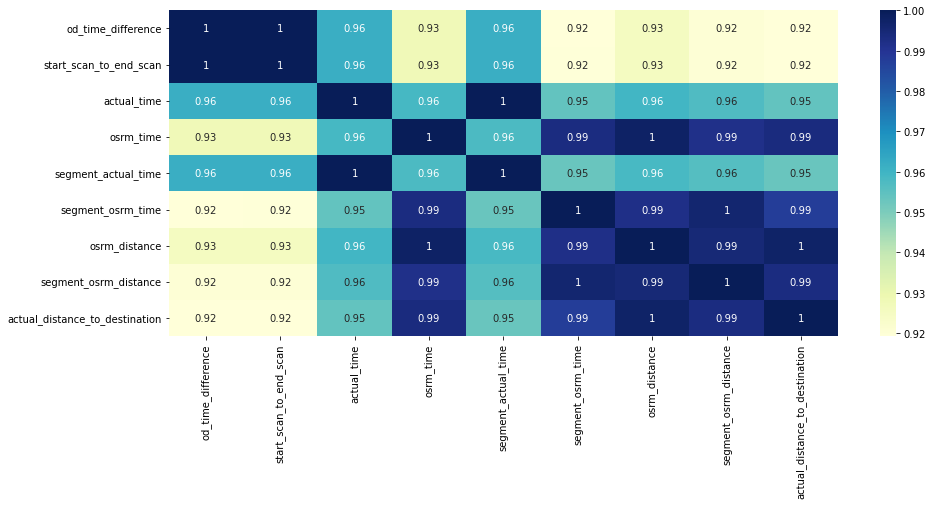

In [87]:
# Correlation Plot above of as a Heatmap -
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

##### We can see all above numerical variables are highly correlated to each other as expected. As distance to destination increases time taken for delivery also increases which seems correct

In [88]:
#Finding all numeric columns
cols = list(data.columns[(data.dtypes != 'object')])
cols

['od_time_difference',
 'start_scan_to_end_scan',
 'actual_time',
 'osrm_time',
 'segment_actual_time',
 'segment_osrm_time',
 'osrm_distance',
 'segment_osrm_distance',
 'actual_distance_to_destination']

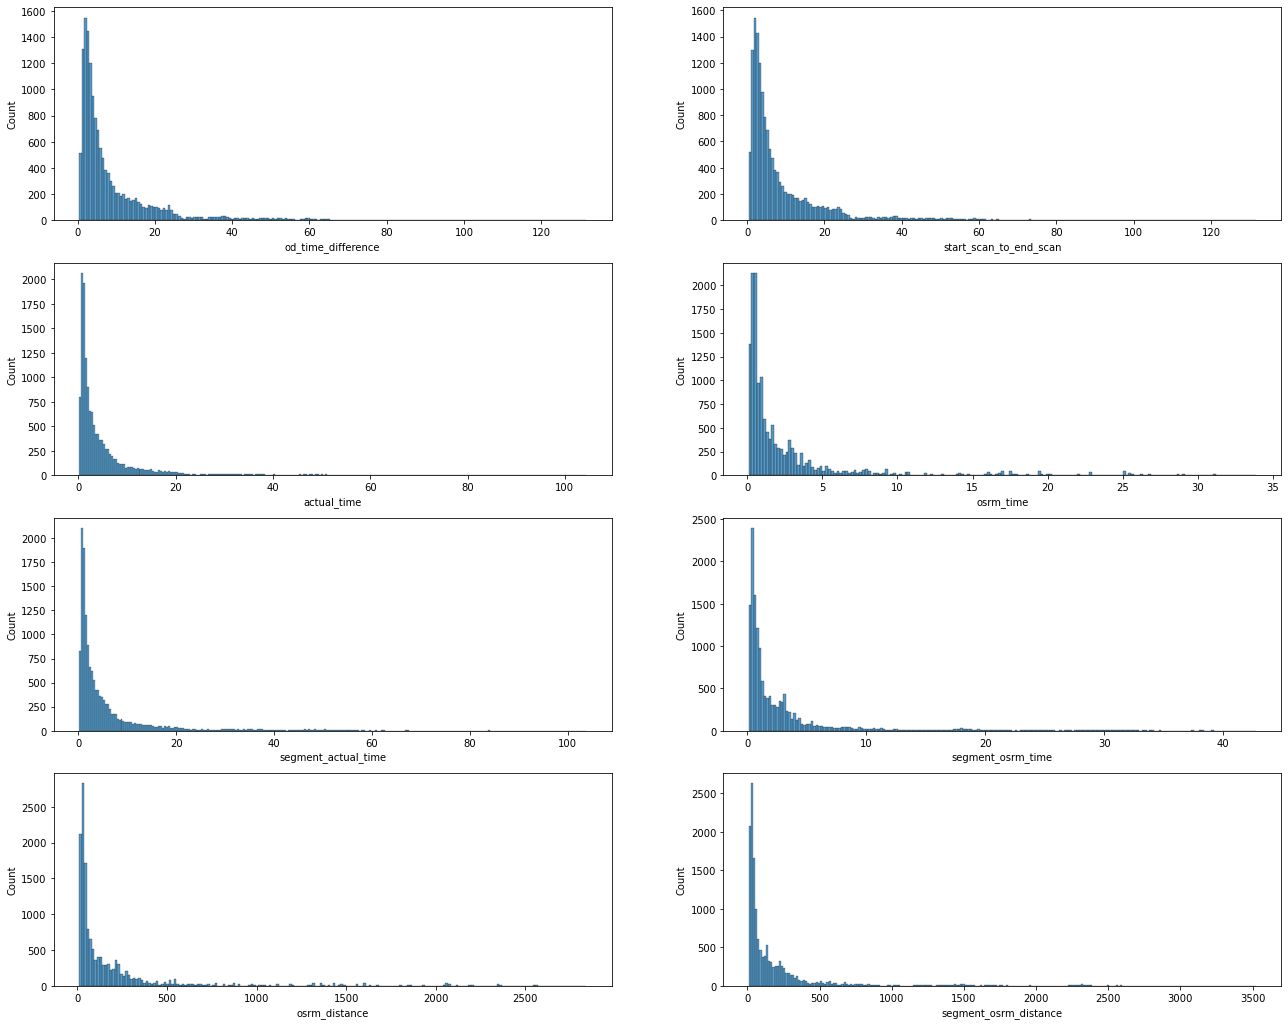

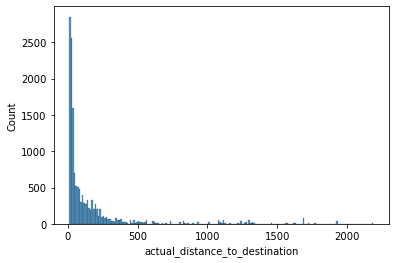

In [89]:
#Checking the distribution
Fig, Axes = plt.subplots(nrows=4, ncols=2, figsize=(22,18))
k = 0
for i in range(4):
    for j in range(2):
        sns.histplot(data=data, x = cols[k], ax=Axes[i,j])
        k += 1
plt.show()
sns.histplot(data=data, x = cols[-1])
plt.show()

##### We can see that all variables are right skewed

### Outlier Treatment

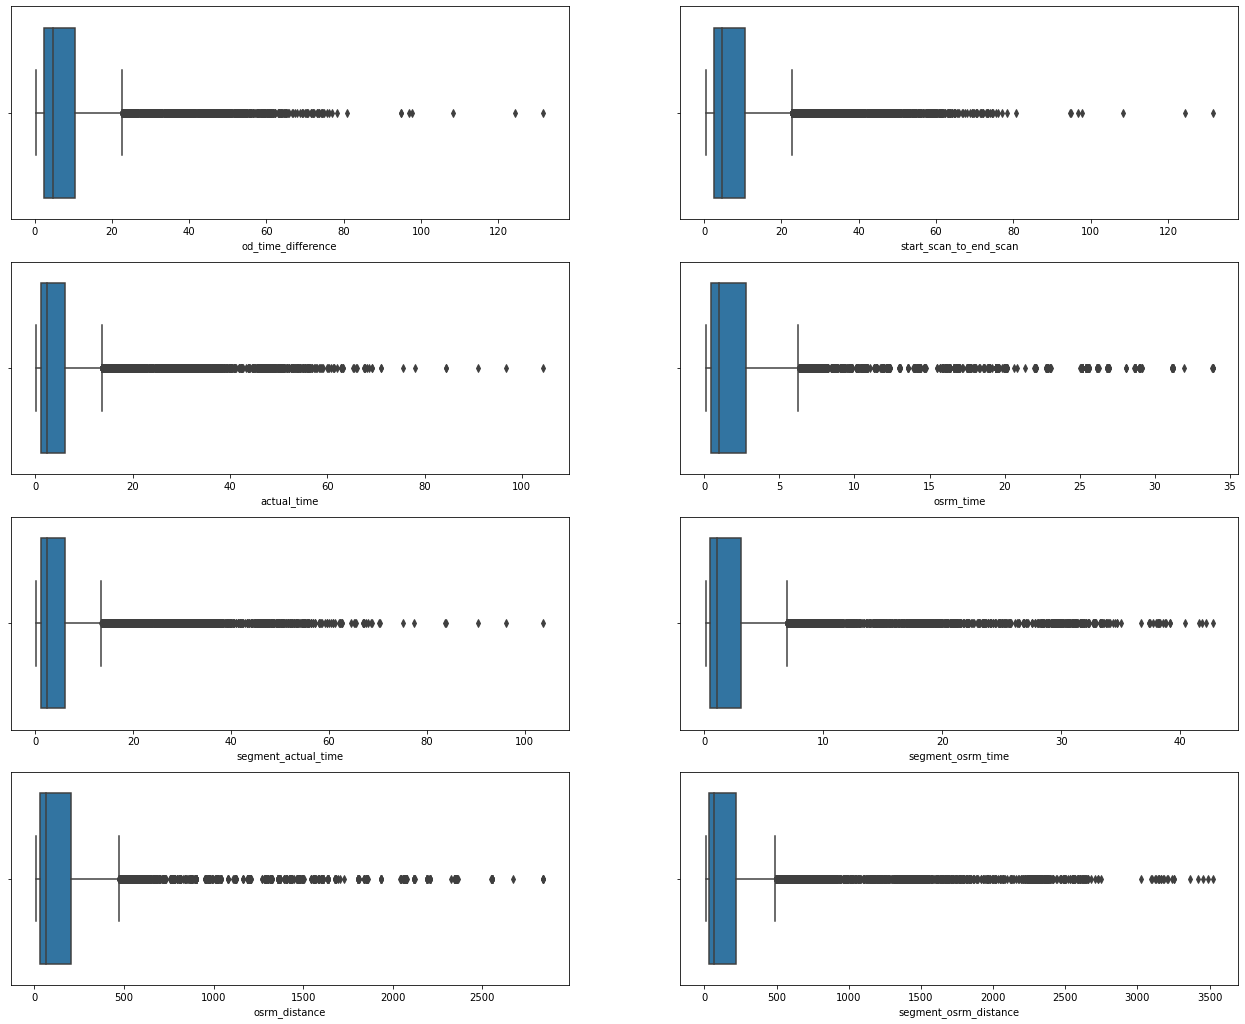

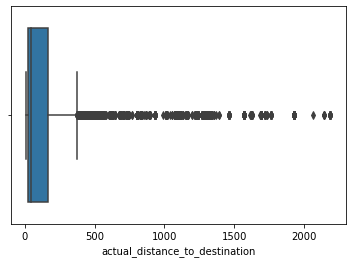

In [90]:
#Looking for outliers using boxplot
Fig, Axes = plt.subplots(nrows=4, ncols=2, figsize=(22,18))
k = 0
for i in range(4):
    for j in range(2):
        sns.boxplot(data=data, x = cols[k], ax=Axes[i,j])
        k += 1
plt.show()
sns.boxplot(data=data, x = cols[-1])
plt.show()

In [91]:
#Checking for percentage of outliers present in all numeric variables
for col in cols:
    data_count = data[col]
    q1 = np.percentile(data_count,25)
    q3 = np.percentile(data_count,75)
    IQR = q3-q1
    upper= q3+1.5*IQR
    lower= q1-1.5*IQR
    if lower < 0:
        lower = 0
    length_excl_outliers = len(data[(data_count>lower)&(data_count<upper)])
    print(f'{np.round((len(data_count)-length_excl_outliers)/len(data_count)*100,3)}% outliers are present in {col}')

8.622% outliers are present in od_time_difference
8.67% outliers are present in start_scan_to_end_scan
11.138% outliers are present in actual_time
10.185% outliers are present in osrm_time
11.131% outliers are present in segment_actual_time
10.09% outliers are present in segment_osrm_time
10.293% outliers are present in osrm_distance
10.482% outliers are present in segment_osrm_distance
9.819% outliers are present in actual_distance_to_destination


In [92]:
#Removing outliers
data_without_outliers = data.loc[(np.abs(stats.zscore(data[cols])) < 3).all(axis=1)]
data_without_outliers

,trip_uuid,source_state,source_city,destination_state,destination_city,route_type,data,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,Madhya Pradesh,Bhopal,Haryana,Gurgaon,FTL,training,37.668497,37.650000,26.033333,11.950000,25.800000,16.800000,991.3523,1320.4733,824.732854
1,trip-153671042288605164,Karnataka,Tumkur,Karnataka,Chikblapur,Carting,training,3.026865,3.000000,2.383333,1.133333,2.350000,1.083333,85.1110,84.1894,73.186911
3,trip-153671046011330457,Maharashtra,Mumbai,Maharashtra,Mumbai,Carting,training,1.674916,1.666667,0.983333,0.250000,0.983333,0.266667,19.6800,19.8766,17.175274
4,trip-153671052974046625,Karnataka,Bellary,Karnataka,Bellary,FTL,training,11.972484,11.950000,5.683333,1.950000,5.666667,1.916667,146.7918,146.7919,127.448500
5,trip-153671055416136166,Tamil Nadu,Chennai,Tamil Nadu,Chennai,Carting,training,3.174797,3.150000,1.016667,0.383333,1.000000,0.383333,28.0647,28.0647,24.597048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Punjab,Chandigarh,Punjab,Chandigarh,Carting,test,4.300482,4.283333,1.383333,1.033333,1.366667,1.033333,73.4630,64.8551,57.762332
14783,trip-153861104386292051,Haryana,FBD,Haryana,Faridabad,Carting,test,1.009842,1.000000,0.350000,0.200000,0.350000,0.183333,16.0882,16.0883,15.513784
14784,trip-153861106442901555,Uttar Pradesh,Kanpur,Uttar Pradesh,Kanpur,Carting,test,7.035331,7.016667,4.700000,0.800000,4.683333,1.466667,58.9037,104.8866,38.684839
14785,trip-153861115439069069,Tamil Nadu,Tirunelveli,Tamil Nadu,Tirunelveli,Carting,test,5.808548,5.783333,4.400000,2.983333,4.300000,3.683333,171.1103,223.5324,134.723836


### One Hot Encoding for route_type and data( i.e training or test)

In [93]:
#One hot encoding
ohe_data = pd.get_dummies(data, columns = ['route_type', 'data'])
ohe_data

,trip_uuid,source_state,source_city,destination_state,destination_city,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination,route_type_Carting,route_type_FTL,data_test,data_training
0,trip-153671041653548748,Madhya Pradesh,Bhopal,Haryana,Gurgaon,37.668497,37.650000,26.033333,11.950000,25.800000,16.800000,991.3523,1320.4733,824.732854,0,1,0,1
1,trip-153671042288605164,Karnataka,Tumkur,Karnataka,Chikblapur,3.026865,3.000000,2.383333,1.133333,2.350000,1.083333,85.1110,84.1894,73.186911,1,0,0,1
2,trip-153671043369099517,Karnataka,Bengaluru,Punjab,Chandigarh,65.572709,65.550000,55.783333,29.000000,55.133333,32.350000,2354.0665,2545.2678,1927.404273,0,1,0,1
3,trip-153671046011330457,Maharashtra,Mumbai,Maharashtra,Mumbai,1.674916,1.666667,0.983333,0.250000,0.983333,0.266667,19.6800,19.8766,17.175274,1,0,0,1
4,trip-153671052974046625,Karnataka,Bellary,Karnataka,Bellary,11.972484,11.950000,5.683333,1.950000,5.666667,1.916667,146.7918,146.7919,127.448500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Punjab,Chandigarh,Punjab,Chandigarh,4.300482,4.283333,1.383333,1.033333,1.366667,1.033333,73.4630,64.8551,57.762332,1,0,1,0
14783,trip-153861104386292051,Haryana,FBD,Haryana,Faridabad,1.009842,1.000000,0.350000,0.200000,0.350000,0.183333,16.0882,16.0883,15.513784,1,0,1,0
14784,trip-153861106442901555,Uttar Pradesh,Kanpur,Uttar Pradesh,Kanpur,7.035331,7.016667,4.700000,0.800000,4.683333,1.466667,58.9037,104.8866,38.684839,1,0,1,0
14785,trip-153861115439069069,Tamil Nadu,Tirunelveli,Tamil Nadu,Tirunelveli,5.808548,5.783333,4.400000,2.983333,4.300000,3.683333,171.1103,223.5324,134.723836,1,0,1,0


#### Lebel Encoding for route_type and data( i.e training or test)

In [94]:
le_data = data.copy() #creating a copy of original dataset first
label_encoder = LabelEncoder()
le_data['route_type'] = label_encoder.fit_transform(le_data['route_type']) #lebel encoding route_type
le_data['route_type'].value_counts()

0    8906
1    5881
Name: route_type, dtype: int64

In [95]:
#lebel encoding the data(training or test)
le_data['data'] = label_encoder.fit_transform(le_data['data']) #lebel encoding route_type
le_data['data'].value_counts()

1    10645
0     4142
Name: data, dtype: int64

In [96]:
le_data.head()

,trip_uuid,source_state,source_city,destination_state,destination_city,route_type,data,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,Madhya Pradesh,Bhopal,Haryana,Gurgaon,1,1,37.668497,37.650000,26.033333,11.950000,25.800000,16.800000,991.3523,1320.4733,824.732854
1,trip-153671042288605164,Karnataka,Tumkur,Karnataka,Chikblapur,0,1,3.026865,3.000000,2.383333,1.133333,2.350000,1.083333,85.1110,84.1894,73.186911
2,trip-153671043369099517,Karnataka,Bengaluru,Punjab,Chandigarh,1,1,65.572709,65.550000,55.783333,29.000000,55.133333,32.350000,2354.0665,2545.2678,1927.404273
3,trip-153671046011330457,Maharashtra,Mumbai,Maharashtra,Mumbai,0,1,1.674916,1.666667,0.983333,0.250000,0.983333,0.266667,19.6800,19.8766,17.175274
4,trip-153671052974046625,Karnataka,Bellary,Karnataka,Bellary,1,1,11.972484,11.950000,5.683333,1.950000,5.666667,1.916667,146.7918,146.7919,127.448500


In [97]:
le_data.corr()

,route_type,data,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
route_type,1.000000,0.051797,0.529767,0.529556,0.505235,0.514967,0.505913,0.496611,0.503163,0.485516,0.498640
data,0.051797,1.000000,0.007232,0.007231,0.013447,0.016811,0.013291,0.012979,0.014157,0.010997,0.013541
od_time_difference,0.529767,0.007232,1.000000,0.999999,0.961600,0.927490,0.961610,0.919431,0.925201,0.920171,0.919145
start_scan_to_end_scan,0.529556,0.007231,0.999999,1.000000,0.961652,0.927545,0.961662,0.919503,0.925280,0.920264,0.919231
actual_time,0.505235,0.013447,0.961600,0.961652,1.000000,0.958781,0.999989,0.954044,0.959398,0.957151,0.953920
osrm_time,0.514967,0.016811,0.927490,0.927545,0.958781,1.000000,0.957955,0.993263,0.997588,0.991624,0.993568
segment_actual_time,0.505913,0.013291,0.961610,0.961662,0.999989,0.957955,1.000000,0.953214,0.958540,0.956293,0.952987
segment_osrm_time,0.496611,0.012979,0.919431,0.919503,0.954044,0.993263,0.953214,1.000000,0.991802,0.996098,0.987542
osrm_distance,0.503163,0.014157,0.925201,0.925280,0.959398,0.997588,0.958540,0.991802,1.000000,0.994712,0.997268
segment_osrm_distance,0.485516,0.010997,0.920171,0.920264,0.957151,0.991624,0.956293,0.996098,0.994712,1.000000,0.993068


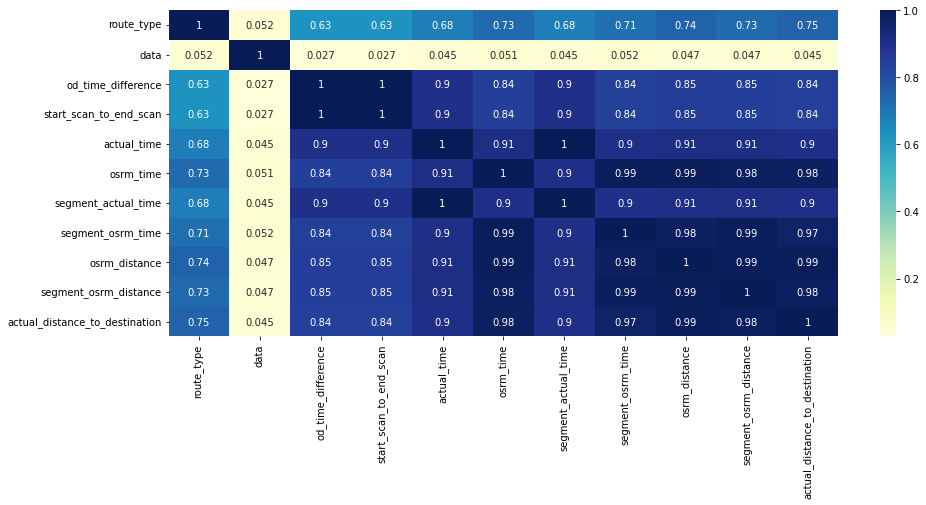

In [98]:
# Correlation Plot above of as a Heatmap -
plt.figure(figsize=(15,6))
sns.heatmap(le_data.corr(method= 'spearman'), cmap="YlGnBu", annot=True)
plt.show()

##### We can see that time taken for delivery and segment time are almost uncorrelated with data(training or test) but correlated with route_type

### Standardizing the numerical features

In [99]:
col_s = list(ohe_data.columns[(ohe_data.dtypes != 'object')])
col_s

['od_time_difference',
 'start_scan_to_end_scan',
 'actual_time',
 'osrm_time',
 'segment_actual_time',
 'segment_osrm_time',
 'osrm_distance',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'route_type_Carting',
 'route_type_FTL',
 'data_test',
 'data_training']

In [100]:
#Using standard scaler to normalize
scaler = StandardScaler()
std_data = scaler.fit_transform(ohe_data[col_s])
std_data = pd.DataFrame(std_data, columns=col_s)
std_data.head()

,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination,route_type_Carting,route_type_FTL,data_test,data_training
0,2.627559,2.627858,2.147277,2.048290,2.147833,2.629714,2.125107,2.633597,2.162548,-1.230597,1.230597,-0.623781,0.623781
1,-0.529624,-0.530858,-0.379887,-0.342571,-0.381163,-0.367090,-0.320538,-0.332307,-0.297563,0.812614,-0.812614,-0.623781,0.623781
2,5.170704,5.171240,5.326268,5.816936,5.311326,5.594737,5.802622,5.571936,5.772034,-1.230597,1.230597,-0.623781,0.623781
3,-0.652838,-0.652405,-0.529486,-0.537818,-0.528553,-0.522809,-0.497115,-0.486596,-0.480911,0.812614,-0.812614,-0.623781,0.623781
4,0.285666,0.285030,-0.027259,-0.162059,-0.023473,-0.208192,-0.154082,-0.182120,-0.119943,-1.230597,1.230597,-0.623781,0.623781


In [101]:
std_data.describe()

,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination,route_type_Carting,route_type_FTL,data_test,data_training
count,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04
mean,3.249131e-17,-4.310026e-17,-3.748232e-17,1.016071e-16,-1.445873e-17,-1.547870e-16,-5.215128e-17,-5.206869e-17,2.986723e-17,2.503802e-16,-2.503802e-16,1.506139e-13,-1.506137e-13
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-7.698498e-01,-7.693948e-01,-6.185337e-01,-5.709735e-01,-6.184254e-01,-5.545885e-01,-5.257399e-01,-5.125146e-01,-5.076644e-01,-1.230597e+00,-8.126139e-01,-6.237811e-01,-1.603126e+00
25%,-5.780991e-01,-5.779575e-01,-5.152387e-01,-4.862435e-01,-5.159714e-01,-4.783178e-01,-4.672220e-01,-4.561227e-01,-4.625745e-01,-1.230597e+00,-8.126139e-01,-6.237811e-01,-1.603126e+00
50%,-3.806140e-01,-3.804428e-01,-3.709820e-01,-3.720421e-01,-3.703788e-01,-3.670896e-01,-3.739940e-01,-3.668653e-01,-3.790674e-01,8.126139e-01,-8.126139e-01,-6.237811e-01,6.237811e-01
75%,1.568397e-01,1.558856e-01,1.904543e-02,2.582079e-02,1.966547e-02,1.108595e-02,7.439660e-03,-1.474182e-02,-1.633224e-03,8.126139e-01,1.230597e+00,1.603126e+00,6.237811e-01
max,1.119220e+01,1.119544e+01,1.052307e+01,6.892639e+00,1.056344e+01,7.574598e+00,7.114214e+00,7.919079e+00,6.620263e+00,8.126139e-01,1.230597e+00,1.603126e+00,6.237811e-01


In [102]:
#using MinMaxScaler to standardize
scaler = MinMaxScaler()
std_data = scaler.fit_transform(ohe_data[col_s])
std_data = pd.DataFrame(std_data, columns=col_s)
std_data.head()

,od_time_difference,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination,route_type_Carting,route_type_FTL,data_test,data_training
0,0.284016,0.283937,0.248242,0.350938,0.247388,0.391712,0.346972,0.373134,0.374613,0.0,1.0,0.0,1.0
1,0.020082,0.019937,0.021419,0.030602,0.021218,0.023065,0.026859,0.021373,0.029476,1.0,0.0,0.0,1.0
2,0.496617,0.496508,0.533568,0.855874,0.530301,0.756450,0.828325,0.721625,0.880999,0.0,1.0,0.0,1.0
3,0.009782,0.009778,0.007992,0.004442,0.008037,0.003909,0.003747,0.003074,0.003753,1.0,0.0,0.0,1.0
4,0.088239,0.088127,0.053069,0.054788,0.053207,0.042611,0.048647,0.039185,0.054395,0.0,1.0,0.0,1.0
